In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the dataset
df = pd.read_csv('GOOG.csv', date_parser = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [3]:
# define rolling window
rolling = 60

In [4]:
# select training data before 2019
train = df[df['Date'] < '2019-01-01'].copy()

# select test data after 2019
test = df[df['Date'] >= '2019-01-01'].copy()

# adding the last rolling + 1 values of the train data for the test data 
test = train.tail(rolling + 1).append(test, ignore_index = True )

In [5]:
# dropping column Date on training data
train = train.drop(['Date'], axis = 1)

# dropping column Date on test data
test = test.drop(['Date'], axis = 1)

In [6]:
print('In train data')
print('there are ' + str(train.shape[0]) + ' rows and ' + str(train.shape[1]) + ' columns')

print('\nIn test data')
print('there are ' + str(test.shape[0]) + ' rows and ' + str(test.shape[1]) + ' columns')

In train data
there are 3617 rows and 6 columns

In test data
there are 407 rows and 6 columns


In [7]:
# scaling data
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [8]:
X_train = []
y_train = []

for i in range(rolling, train.shape[0]):      # train.shape[0] --> number of rows in train data
    X_train.append(train[i-rolling:i])       
    y_train.append(train[i,4])               # 0: open, 1: high, 2: low, 3: close, 4: adj close, 5: volume

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape[2]

6

In [10]:
X_test = []
y_test = []

for i in range(rolling, test.shape[0]):      # train.shape[0] --> number of rows in train data
    X_test.append(test[i-rolling:i])       
    y_test.append(test[i,4])               # 0: open, 1: high, 2: low, 3: close, 4: adj close, 5: volume

X_test, y_test = np.array(X_test), np.array(y_test)

# LSTM

In [66]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [12]:
model = Sequential()

model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, return_sequences = False))
model.add(Dropout(0.3))

model.add(Dense(units = 1))


model.compile(optimizer='nadam', loss = 'mae', metrics=['mean_squared_error'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            16080     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                45120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 61,281
Trainable params: 61,281
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train --> take a lot of time
history = model.fit(X_train,y_train, epochs= 50, validation_split=0.2, batch_size=100)

Train on 2845 samples, validate on 712 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
2845/2845 [==============================] - 13s 5ms/sample - loss: 0.0475 - mean_squared_error: 0.0067 - val_loss: 0.1500 - val_mean_squared_error: 0.0236
Epoch 2/50
2845/2845 [==============================] - 10s 4ms/sample - loss: 0.0282 - mean_squared_error: 0.0015 - val_loss: 0.0309 - val_mean_squared_error: 0.0013
Epoch 3/50
2845/2845 [==============================] - 10s 4ms/sample - loss: 0.0234 - mean_squared_error: 0.0011 - val_loss: 0.0329 - val_mean_squared_error: 0.0014
Epoch 4/50
2845/2845 [==============================] - 9s 3ms/sample - loss: 0.0224 - mean_squared_error: 0.0010 - val_loss: 0.0176 - val_mean_squared_error: 5.3699e-04
Epoch 5/50
2845/2845 [==============================] - 9s 3ms/sample - loss: 0.0214 - mean_squared_error: 9.1066e-04 - val_loss: 0.0321 - val_mean_squared_error: 0.0014
Epoch 6/50
2845/28

Epoch 46/50
2845/2845 [==============================] - 17s 6ms/sample - loss: 0.0106 - mean_squared_error: 2.6316e-04 - val_loss: 0.0137 - val_mean_squared_error: 3.3935e-04
Epoch 47/50
2845/2845 [==============================] - 18s 6ms/sample - loss: 0.0110 - mean_squared_error: 2.8071e-04 - val_loss: 0.0594 - val_mean_squared_error: 0.0041
Epoch 48/50
2845/2845 [==============================] - 16s 5ms/sample - loss: 0.0113 - mean_squared_error: 2.8794e-04 - val_loss: 0.0135 - val_mean_squared_error: 3.2904e-04
Epoch 49/50
2845/2845 [==============================] - 13s 5ms/sample - loss: 0.0113 - mean_squared_error: 2.8380e-04 - val_loss: 0.0231 - val_mean_squared_error: 8.3551e-04
Epoch 50/50
2845/2845 [==============================] - 13s 5ms/sample - loss: 0.0108 - mean_squared_error: 2.6031e-04 - val_loss: 0.0132 - val_mean_squared_error: 3.1761e-04


In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred = y_pred*scaler.scale_[4]
y_test = y_test*scaler.scale_[4]

# Visualisation

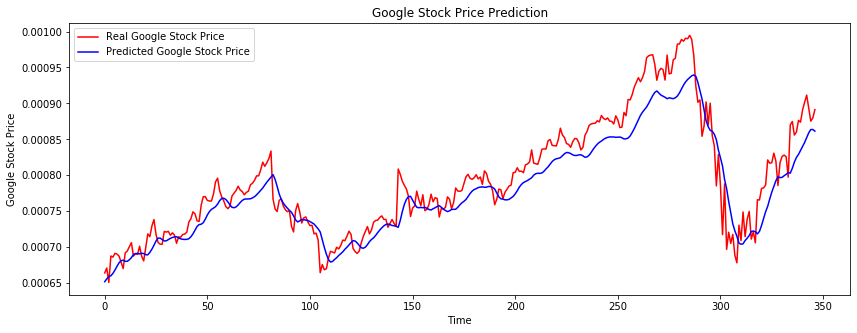

In [46]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

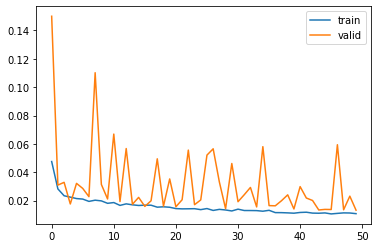

In [18]:
# learning curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

(0.8617565228199997, 2.926044779865552e-05)